The k-means algorithm
---

In [12]:
import pandas as pd
import numpy as np
import os

Exercise - Chigago gambling crimes
---

The city of Chicago disposes of 8 police patrols to fight gambling crimes. They want to assign each patrol to an area of Chicago where there is historically a lot of gambling crimes.

> **Exercise**: Load the gambling crimes data. Create an `X` array with the `Longitude` and the `Latitude` variables (drop the other ones). Create a map of the gambling crimes using these two variables. Find eight centers of gamblings crimes using *k*-means. Plot each cluster with a different color and mark their centers (the centroids).

In [13]:
data_df=pd.read_csv(os.path.join('data','chicago-crimes.csv'))
data_df.head(3)

,Case Number,Block,Description,Location Description,Arrest,Year,Latitude,Longitude
0,G360170,027XX N HOYNE AV,GAME/DICE,CHA HALLWAY/STAIRWELL/ELEVATOR,True,2001,41.932,-87.679
1,HV362360,105XX S LAFAYETTE AVE,GAME/DICE,SIDEWALK,True,2012,41.703,-87.625
2,HX330175,021XX E 71ST ST,GAME/DICE,GROCERY FOOD STORE,True,2014,41.766,-87.574


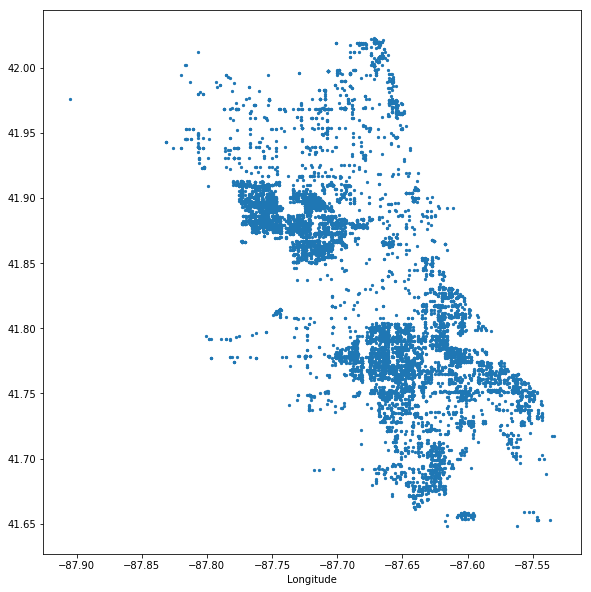

In [15]:
import matplotlib.pyplot as plt

# plot the lat/long from dataset
plt.figure(figsize=(10,10))
# Same scale for the x- and y-axis
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(data_df['Longitude'], data_df['Latitude'], s=5)
plt.xlabel('Longitude')
plt.show()

In [17]:
# Let's get X values as Latitude and Longitude

X=data_df[['Longitude', 'Latitude']].values

from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(
    n_clusters=8,
    random_state=0 # Fix results
)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

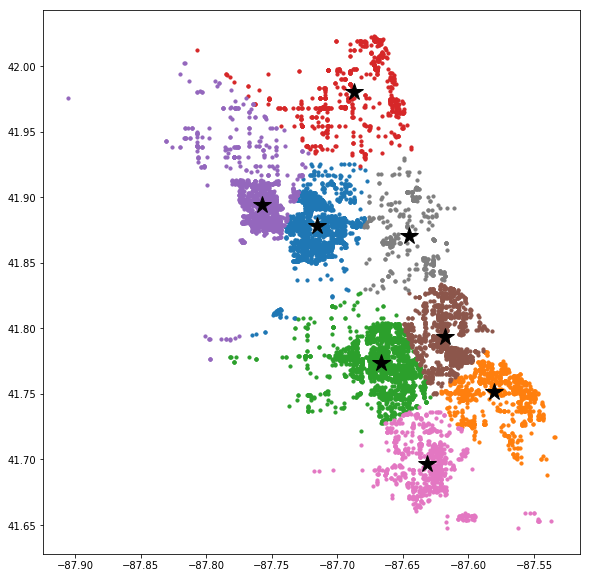

In [19]:
# Plot clusters
# plot the lat/long from dataset
plt.figure(figsize=(10,10))
# Same scale for the x- and y-axis
plt.gca().set_aspect('equal', adjustable='box')

for cluster in [0, 1, 2, 3, 4, 5, 6, 7]:
    # Get points in this cluster
    idx = (kmeans.labels_ == cluster)

    # Plot points
    plt.scatter(
        X[idx, 0], # Third column: petal length
        X[idx, 1], # Fourth column: petal width
        label='cluster {}'.format(cluster),
        s=10
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker='*', color='black', markersize=18)

Challenge - Image compression
---

> **Exercise**: Load the `pepper.jpg` image. Apply *k*-means to the image pixels to extract a palette of 3, 5 or 10 colors. Then re-draw the image using this new palette.

In [6]:
from PIL import Image

pillow_img=Image.open(os.path.join('data','pepper.jpg'))


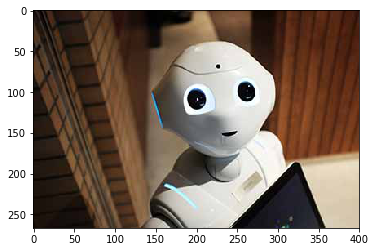

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# convert to array
# Convert into Numpy array
img = np.array(pillow_img)

# Plot the image
plt.imshow(img)
plt.show()

Number of colors: 3


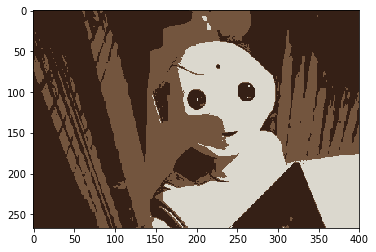

Number of colors: 5


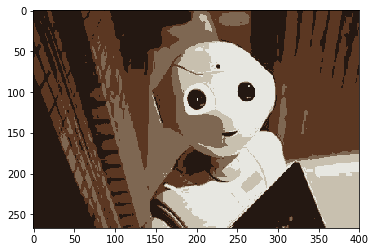

Number of colors: 10


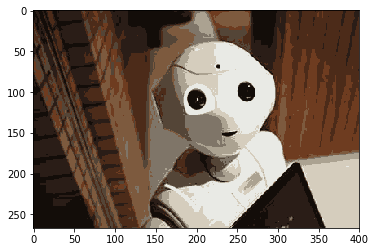

Number of colors: 24


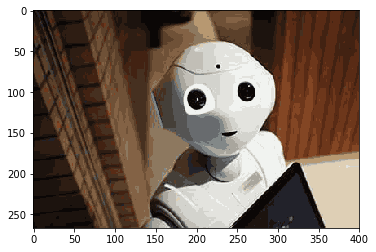

In [39]:

for i in (3, 5, 10, 24):

    # Create k-means object
    kmeans = KMeans(n_clusters=i, random_state=0)

    # reshape img
    X=img.reshape(-1, 3)

    kmeans.fit(X)
    
    print("Number of colors:", i)
    
    palette=kmeans.cluster_centers_
    
    labels=kmeans.labels_
    
    new_pixels=palette[labels]
    
    new_img=new_pixels.reshape(img.shape)
    
    plt.imshow(new_img/255)
    plt.show()


array([[ 19.87821489,  13.38829644,   9.96316874],
       [ 19.87821489,  13.38829644,   9.96316874],
       [ 19.87821489,  13.38829644,   9.96316874],
       ...,
       [213.60564711, 205.66967566, 189.77946888],
       [213.60564711, 205.66967566, 189.77946888],
       [213.60564711, 205.66967566, 189.77946888]])

In [11]:
kmeans.cluster_centers_


array([[-87.73351859,  41.88462132],
       [-87.66512746,  41.77517945],
       [-87.60282285,  41.78351132],
       [-87.68463841,  41.96896425],
       [-87.62271665,  41.70189887]])